In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
##if it seperated by anything except a coma do this below
##df = pd.read_csv("file.csv",sep = "|")
##df = pd.read_csv("file.csv",comment = "#")
df1 = pd.read_excel("Student_performance1.xlsx")
df1

,Access_no,gender,age,course,DSC3108,DSC3114,MTH3108,SYE3104
0,Q104895,Female,21.0,Engineering,1000.0,88.0,NaN,94.0
1,J499692,Male,35.0,Engineering,71.0,77.0,90.0,76.0
2,F664488,Female,22.0,Engineering,90.0,83.0,80.0,NaN
3,L070268,Male,32.0,Engineering,83.0,80.0,77.0,97.0
4,F695622,Male,27.0,Computer Science,79.0,83.0,64.0,58.0
...,...,...,...,...,...,...,...,...
295,N524494,Male,35.0,Engineering,94.0,53.0,96.0,59.0
296,Y193431,Male,NaN,Mathematics,NaN,52.0,63.0,100.0
297,R876132,Female,40.0,Computer Science,66.0,95.0,78.0,94.0
298,A471182,Male,36.0,Business,67.0,71.0,86.0,66.0


In [6]:
##EXPLORATORY DATA ANALYSIS
df1.shape

(300, 8)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Access_no  300 non-null    object 
 1   gender     272 non-null    object 
 2   age        269 non-null    float64
 3   course     300 non-null    object 
 4   DSC3108    292 non-null    float64
 5   DSC3114    283 non-null    float64
 6   MTH3108    283 non-null    float64
 7   SYE3104    286 non-null    float64
dtypes: float64(5), object(3)
memory usage: 18.9+ KB


In [16]:
df1.describe()

,age,DSC3108,DSC3114,MTH3108,SYE3104
count,269.000000,292.000000,283.000000,283.000000,286.000000
mean,30.773234,80.301370,93.466431,73.840989,83.968531
std,13.071726,56.682012,293.126195,17.439647,114.821001
min,5.000000,0.000000,50.000000,-9.000000,0.000000
25%,23.000000,64.000000,63.000000,61.000000,64.000000
50%,30.000000,77.000000,76.000000,74.000000,79.000000
75%,36.000000,90.000000,90.000000,88.000000,89.750000
max,120.000000,1000.000000,5000.000000,110.000000,2000.000000


In [15]:
df1.shape

(300, 8)

In [19]:
##Checking for missing values
df1.isna().sum()

Access_no     0
gender       28
age          31
course        0
DSC3108       8
DSC3114      17
MTH3108      17
SYE3104      14
dtype: int64

In [23]:
##gender missing values
df1["gender"] = df1["gender"].fillna(df1["gender"].mode())
df1["gender"].isna().sum()
df1.isna().sum()

Access_no     0
gender        0
age          31
course        0
DSC3108       8
DSC3114      17
MTH3108      17
SYE3104      14
dtype: int64

In [34]:
def visual(data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(data.columns):
        if data[col].dtype in ["float64","int64"]:
            plt.subplot(4,4,i+1)
            plt.hist(data[col])
            plt.title(col)
plt.show()
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

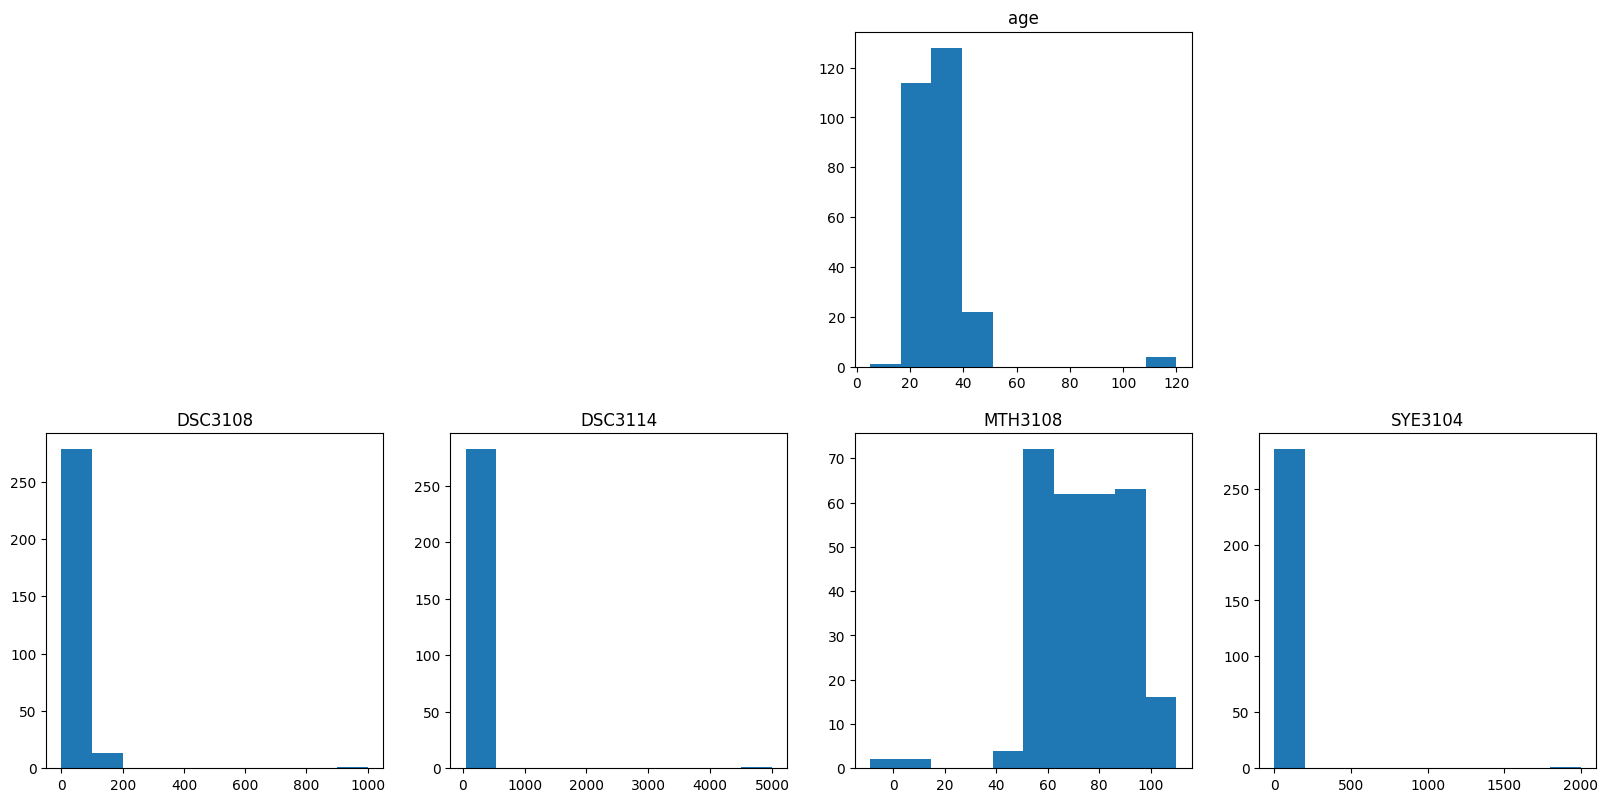

In [35]:
visual(df1)

In [78]:
def remove_missing_values(data):
    for col in data.columns:
        if data[col].dtype in ["float64","int64"]:
            data[col] = data[col].fillna(data[col].median())
    return data

In [79]:
remove_missing_values(df1)
df1.isna().sum()

Access_no    0
gender       0
age          0
course       0
DSC3108      0
DSC3114      0
MTH3108      0
SYE3104      0
dtype: int64

In [55]:
##plotting boxplots 
def visual1(data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(data.columns):
        if data[col].dtype in ['float64','int64']:
            plt.subplot(4,4,i+1)
            sns.boxplot(data[col])
            plt.title(col)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

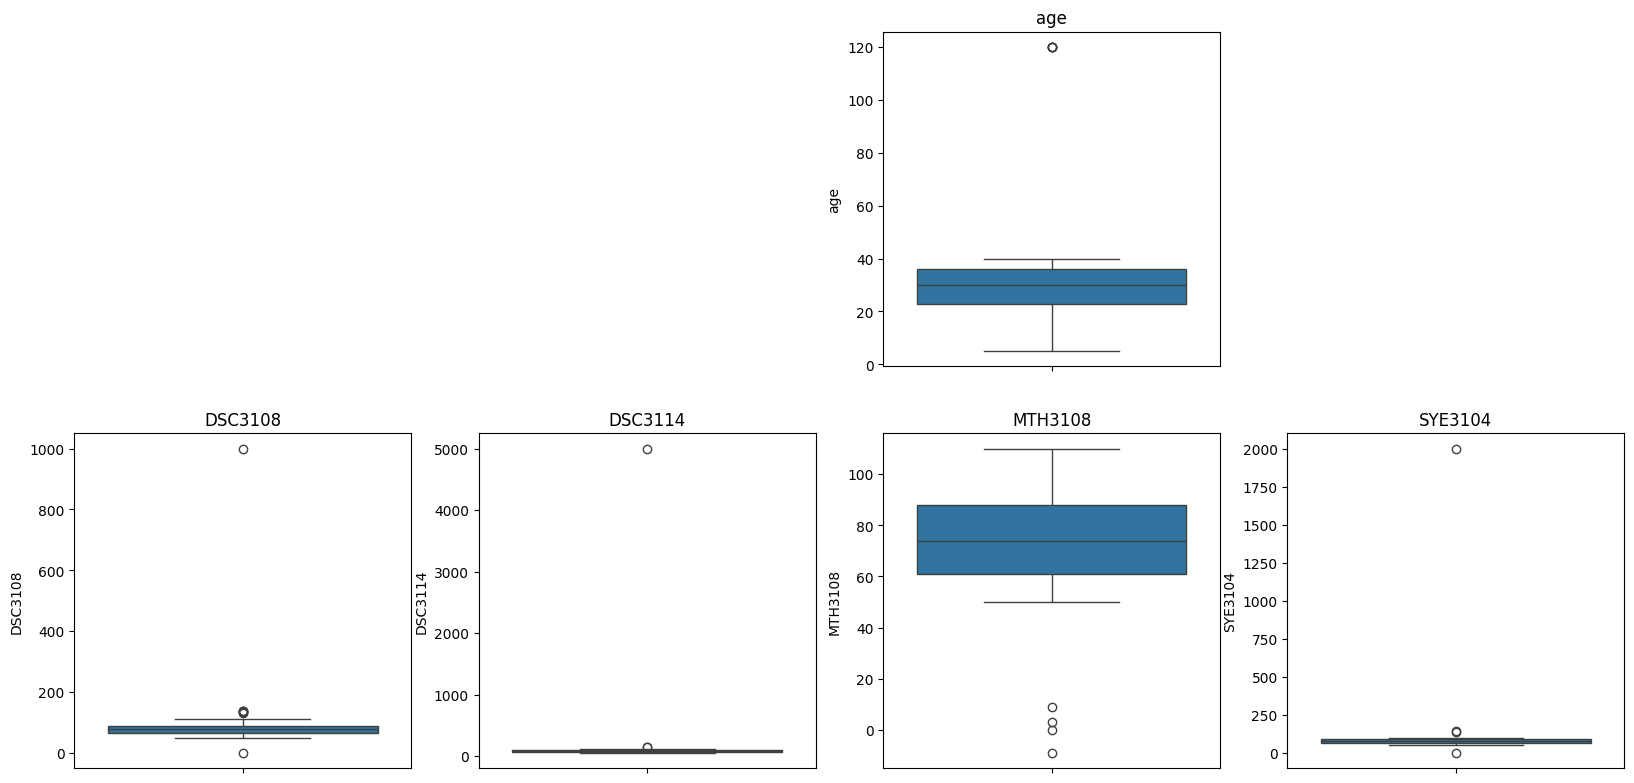

In [56]:
visual1(df1)

In [69]:
def remove_outliers(data):
    for col in data.columns:
        if data[col].dtype in ['float64','int64']:
            q1= data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            IQR = q3 - q1
            upperboundary = q3 + 1.5* IQR
            lowerboundary = q1 - 1.5* IQR

            data[col] = np.where(data[col] > upperboundary,upperboundary,data[col])
            data[col] = np.where(data[col] < lowerboundary,lowerboundary,data[col])

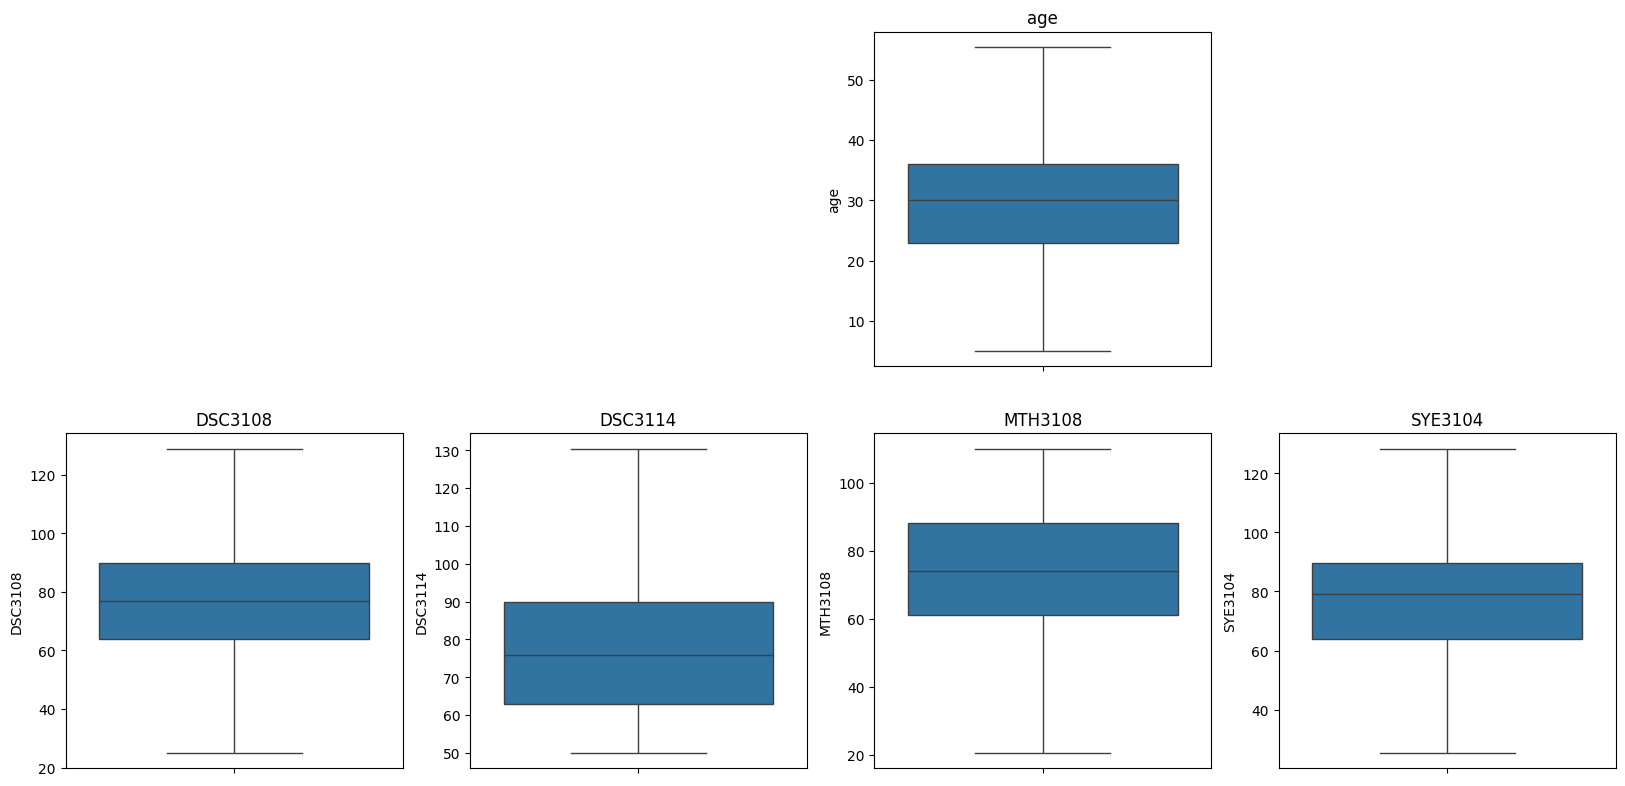

In [71]:
remove_outliers(df1)
visual1(df1)